In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import mean_squared_error
#https://www.statology.org/valueerror-unknown-label-type-continuous/
from sklearn import preprocessing
from sklearn import utils

In [2]:
# Loading data
file_path = Path("../Resources/TX_full_data.csv")
df_texas = pd.read_csv(file_path)
df_texas.head()

,zipcode,latitude,longitude,state,population,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,Net_Income,bedroom_number,bathroom_number,living_space,land_space
0,75001,32.96,-96.84,TX,16287.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,31081.0,2.0,3.0,1981.0,1873.0
1,75002,33.09,-96.61,TX,71102.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,97936.0,4.0,3.0,3044.0,3827.0
2,75006,32.96,-96.90,TX,48104.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,115491.0,3.0,2.0,1938.0,5075.0
3,75007,33.00,-96.90,TX,54448.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,100570.0,3.0,2.0,2049.0,6753.0
4,75009,33.34,-96.75,TX,24737.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,16893.0,4.0,4.0,3153.0,5374.0


In [3]:
df_texas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1164 entries, 0 to 1163
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   zipcode          1164 non-null   int64  
 1   latitude         1164 non-null   float64
 2   longitude        1164 non-null   float64
 3   state            1164 non-null   object 
 4   population       1164 non-null   float64
 5   P_2015           1164 non-null   float64
 6   P_2016           1164 non-null   float64
 7   P_2017           1164 non-null   float64
 8   P_2018           1164 non-null   float64
 9   P_2019           1164 non-null   float64
 10  P_2020           1164 non-null   float64
 11  P_2021           1164 non-null   float64
 12  P_2022           1164 non-null   float64
 13  P_2023           1164 non-null   float64
 14  Net_Income       1164 non-null   float64
 15  bedroom_number   1164 non-null   float64
 16  bathroom_number  1164 non-null   float64
 17  living_space  

In [4]:
df_texas = df_texas[["zipcode","living_space","land_space",
    "population","Net_Income", "P_2015", "P_2016","P_2017","P_2018","P_2019","P_2020","P_2021","P_2022","P_2023"]]

df_texas

,zipcode,living_space,land_space,population,Net_Income,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023
0,75001,1981.0,1873.0,16287.0,31081.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59
1,75002,3044.0,3827.0,71102.0,97936.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11
2,75006,1938.0,5075.0,48104.0,115491.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77
3,75007,2049.0,6753.0,54448.0,100570.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13
4,75009,3153.0,5374.0,24737.0,16893.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,79932,2911.0,2628.0,28594.0,64695.0,176934.86,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96
1160,79934,1858.0,5680.0,26916.0,52143.0,138851.74,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70
1161,79935,1670.0,4356.0,19073.0,47940.0,137056.90,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27
1162,79936,2266.0,4808.0,107579.0,301052.0,120197.98,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10


In [5]:
X = df_texas.drop(columns='P_2023')

In [6]:
y = df_texas["P_2023"].ravel()
y[:5]

array([454387.59, 464720.11, 341701.77, 400732.13, 557517.04])

In [7]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X_train.shape)
print(X_test.shape)

(931, 13)
(233, 13)


In [9]:
scaler = StandardScaler()

In [10]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [11]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [46]:
#not making the y values countious
#https://www.statology.org/valueerror-unknown-label-type-continuous/
lab = preprocessing.LabelEncoder()
y_transformed_train = lab.fit_transform(y_train)
y_transformed_test= lab.fit_transform(y_test)


In [53]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=750, random_state=78)

In [54]:
# Fitting the model
rf_model.fit(X_train_scaled, y_transformed_train)

RandomForestClassifier(n_estimators=750, random_state=78)

In [55]:
#predicting the values 
predictions = rf_model.predict(X_test_scaled)

In [59]:
#adding the y_predictions colummn  
df_texas.loc[X_test.index, 'P_2024'] = predictions
df_texas

,zipcode,living_space,land_space,population,Net_Income,P_2015,P_2016,P_2017,P_2018,P_2019,P_2020,P_2021,P_2022,P_2023,P_2024
0,75001,1981.0,1873.0,16287.0,31081.0,273859.58,295281.26,319308.56,332937.39,333861.35,339818.07,378728.24,440760.63,454387.59,NaN
1,75002,3044.0,3827.0,71102.0,97936.0,239753.96,264265.55,284191.72,296218.09,296925.02,305948.22,360917.02,456706.81,464720.11,NaN
2,75006,1938.0,5075.0,48104.0,115491.0,166228.03,190571.63,211957.41,230517.64,237664.55,247785.26,278907.45,332128.56,341701.77,NaN
3,75007,2049.0,6753.0,54448.0,100570.0,202984.63,229672.38,252570.85,270069.18,275111.24,285478.08,325031.65,389614.50,400732.13,NaN
4,75009,3153.0,5374.0,24737.0,16893.0,280691.57,310914.56,336086.42,346691.19,347364.97,354443.47,428784.45,567323.67,557517.04,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,79932,2911.0,2628.0,28594.0,64695.0,176934.86,179033.62,183000.01,185882.25,189696.92,198709.50,226266.56,265277.04,284235.96,NaN
1160,79934,1858.0,5680.0,26916.0,52143.0,138851.74,140395.78,144044.67,146709.51,149589.80,157418.79,179247.74,211339.40,227529.70,NaN
1161,79935,1670.0,4356.0,19073.0,47940.0,137056.90,139848.83,145683.58,146447.51,149132.47,156838.38,176646.79,203449.85,217041.27,NaN
1162,79936,2266.0,4808.0,107579.0,301052.0,120197.98,122715.88,126302.68,128403.43,132271.22,140227.00,159298.83,184177.53,199986.10,NaN


In [56]:
#doing the accuary and r^2 values
mse = mean_squared_error(y_transformed_test, predictions)
acc_score = accuracy_score(y_transformed_test, predictions)
print(f'Mean Squared Error: {mse}')
print(f"Accuracy Score : {acc_score}")

Mean Squared Error: 153846.48497854077
Accuracy Score : 0.0


In [57]:
#finding the most important features in the chart
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.08665223288964975, 'zipcode'),
 (0.08478905013467279, 'land_space'),
 (0.08363778067957715, 'living_space'),
 (0.08225446374809162, 'population'),
 (0.08185029515094645, 'Net_Income'),
 (0.07709479567578066, 'P_2022'),
 (0.07603491411604017, 'P_2015'),
 (0.07297309052232756, 'P_2021'),
 (0.07263578834762757, 'P_2016'),
 (0.07102366122479248, 'P_2017'),
 (0.0705040419057739, 'P_2020'),
 (0.07039554047554336, 'P_2019'),
 (0.07015434512917666, 'P_2018')]

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

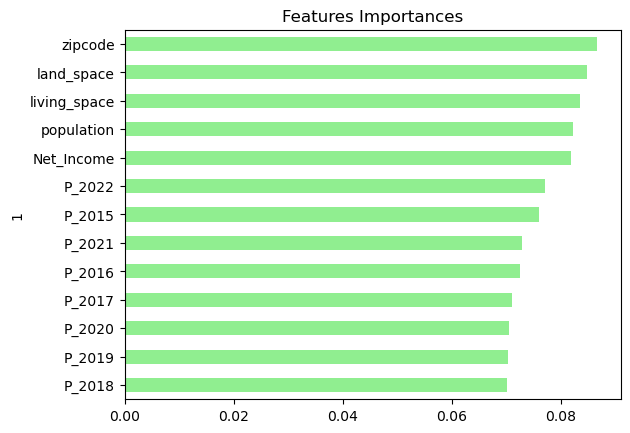

In [58]:
#visual 
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)